In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings("ignore")

In [2]:
data= pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")
pd.set_option("display.max_columns",None)
data=data.reset_index(drop=True)

In [3]:
#replacing NOT AVAILABLE WITH NP.NAN
data.replace("Not Available",np.nan,inplace=True)

In [4]:
#according to the problem our target varaible is ENERGY STAR Score
# We wnat ot change datatype of target variable object to int or float dtype
#Not only target variable we need change which columns contains kwh,ft2,therms,kbtu

# changing the datatypes

In [5]:
l = ["(ft²)", "(kBtu)" ,"(therms)" ,"(kBtu)", "(kWh)", "(kgal)","(therms/ft²)","(gal/ft²)","(kBtu/ft²)","(kWh/ft²)"]
columns=[]
for col in data:
    if col.split()[-1] in l or "(Metric Tons CO2e)" in col:
        data[col]=data[col].astype(float)
        columns.append(col)


In [6]:
data["ENERGY STAR Score"]=data["ENERGY STAR Score"].astype(float)

In [7]:
#checking dtypes after changing
data.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                                object
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                  object
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

# summary

In [9]:
data.describe(exclude=np.number)

,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,2nd Largest Property Use Type,3rd Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
count,11746,11746,11746,11735,11735,11584,11746,207,11746,11622,11624,11628,11746,11746,11744,3741,1484,11689,7137,11746,11628,11716,9483
unique,11740,102,103,11580,11581,11507,11645,176,286,4198,2024,5,55,813,53,58,49,7,6,3537,2,1,144
top,Clinton West Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1019730001,1019730001,4455379,410 West 118th Street,Default Info,10022,1,BROADWAY,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Retail Store,Retail Store,Whole Building,Whole Building,05/01/2017 02:58:14 PM,Yes,In Compliance,Midtown-Midtown South ...
freq,2,11324,11324,26,26,13,12,14,269,66,390,5176,8688,6182,8694,948,297,11648,7111,1258,7552,11716,720


In [10]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019975e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

# Preprocessing 

## finding percentage of missing values

In [11]:
len(data[data.isnull().any(axis=1)])


11746

In [12]:
per=data.isnull().sum()*100/len(data)
per

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                             0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.093649
NYC Borough, Block and Lot (BBL) self-reported                 0.093649
NYC Building Identification Number (BIN)                       1.379193
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.237698
Postal Code                                                    0.000000
Street Number                                                  1.055679
Street Name                                                    1.038651
Borough                                                        1

## visualizing  null values using heatmap

<Axes: >

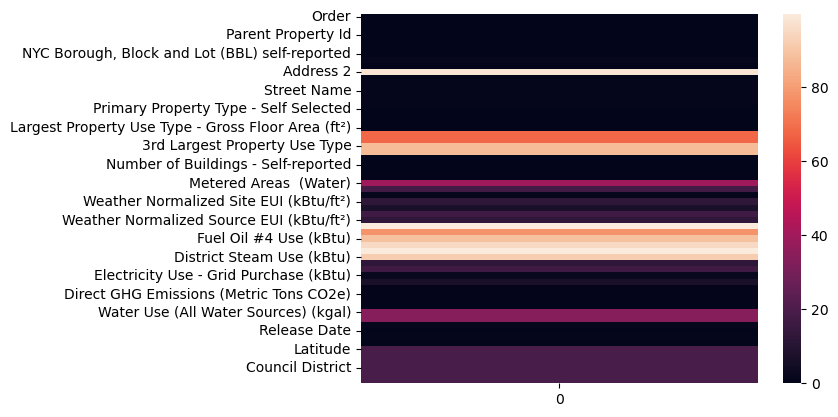

In [13]:
sns.heatmap(pd.DataFrame(per))

In [14]:
#droping the columns which has high missing value percentage 
#imputing the columns which has low missing value percentage


In [15]:
def fill_miss_values():
    for i in data.drop("ENERGY STAR Score",axis=1):
        if per[i]>25:
            data.drop(i,inplace=True,axis=1)#removing columns greater than threshold(25)
        elif per[i]<25 and data[i].dtypes !="object":
            data[i]=data[i].fillna(data[i].median())#filling missing values with median
        else:
            data[i]=data[i].fillna(data[i].mode()[0])#filling missing object with mode
fill_miss_values()

    

In [16]:
# using after developing the model to predict null values
Energy_nan_rows=data[data["ENERGY STAR Score"].isnull()]
Energy_nan_rows.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,1963,2,100,Whole Building,NaN,305.6,303.1,37.8,0.5,614.2,4103962.15,44455.25,38139374.20,11082770.50,6962.2,0.0,6962.2,762051.0,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,1924,1,100,Whole Building,NaN,78.5,82.5,5.3,0.5,129.4,4103962.15,44455.25,1855196.05,541631.25,0.0,0.0,0.0,231342.0,124.9,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,1971,1,100,Whole Building,NaN,78.5,82.5,5.3,0.5,129.4,4103962.15,44455.25,1855196.05,541631.25,0.0,0.0,0.0,1305748.0,124.9,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694.0,1932,1,100,Whole Building,NaN,78.5,82.5,5.3,0.5,129.4,4103962.15,44455.25,1855196.05,541631.25,0.0,0.0,0.0,179694.0,124.9,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
6,7,4778352,Annex Building & Garage,28402,NYP Cornell (East Campus),1014820040,1-01482-0040,1081252,523 East 70th St,10021,512,EAST 71 STREET,Manhattan,245000.0,Mixed Use Property,Other,Other,245000.0,1932,1,60,Whole Building,NaN,78.5,82.5,5.3,0.5,129.4,4103962.15,44455.25,1855196.05,541631.25,0.0,0.0,0.0,245000.0,124.9,04/27/2017 11:23:27 AM,Yes,In Compliance,40.765949,-73.953752,8.0,5.0,124.0,Lenox Hill-Roosevelt Island ...


<Axes: ylabel='ENERGY STAR Score'>

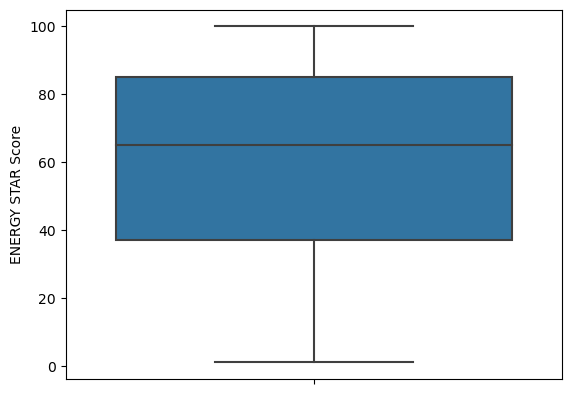

In [17]:

# filling missing values of energy star score with Borough
# visulaize Energy star Score with Borough
sns.boxplot(y="ENERGY STAR Score",hue="Borough",data=data)

In [18]:
def impute_energy_star_score(cols):
    energy=cols[0]
    borough=col[1]
    if pd.isnull(energy):
        if borough=="Bronx":
            return 60
        else:
            return 65
    else:
        return energy
    

In [19]:
data["ENERGY STAR Score"]=data[["ENERGY STAR Score","Borough"]].apply(impute_energy_star_score,axis=1)

In [20]:
data["ENERGY STAR Score"]=data["ENERGY STAR Score"].astype(int)

In [21]:
data.isnull().sum()


Order                                                         0
Property Id                                                   0
Property Name                                                 0
Parent Property Id                                            0
Parent Property Name                                          0
BBL - 10 digits                                               0
NYC Borough, Block and Lot (BBL) self-reported                0
NYC Building Identification Number (BIN)                      0
Address 1 (self-reported)                                     0
Postal Code                                                   0
Street Number                                                 0
Street Name                                                   0
Borough                                                       0
DOF Gross Floor Area                                          0
Primary Property Type - Self Selected                         0
List of All Property Use Types at Proper

# checking duplicates

In [22]:
data[data.duplicated()]
# No duplicates

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA


# finding outliers and treating them

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 46 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11746 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [24]:
# removing unnecessary cols
data=data.iloc[:,16:]
data.drop(columns=["Longitude","Latitude","Council District","Community Board"],inplace=True)


In [25]:
#checking skewness
skew_values=data.select_dtypes(exclude="object").skew()
skew_values

Largest Property Use Type - Gross Floor Area (ft²)             18.808397
Year Built                                                      0.226411
Number of Buildings - Self-reported                            26.436335
Occupancy                                                     -10.009619
ENERGY STAR Score                                              -0.595131
Site EUI (kBtu/ft²)                                            90.886946
Weather Normalized Site EUI (kBtu/ft²)                         93.045941
Weather Normalized Site Electricity Intensity (kWh/ft²)        42.480245
Weather Normalized Site Natural Gas Intensity (therms/ft²)    101.614531
Weather Normalized Source EUI (kBtu/ft²)                       87.146037
Natural Gas Use (kBtu)                                        106.066897
Weather Normalized Site Natural Gas Use (therms)              105.709266
Electricity Use - Grid Purchase (kBtu)                         37.500522
Weather Normalized Site Electricity (kWh)          

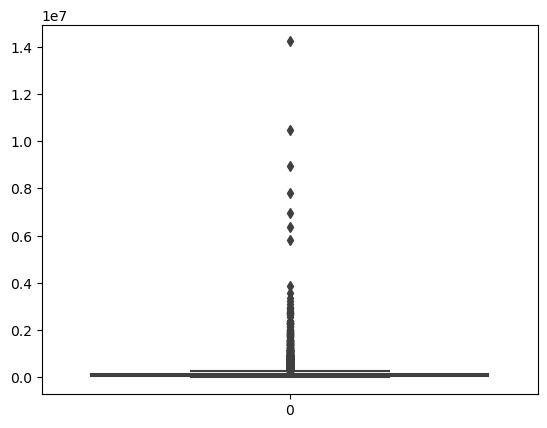

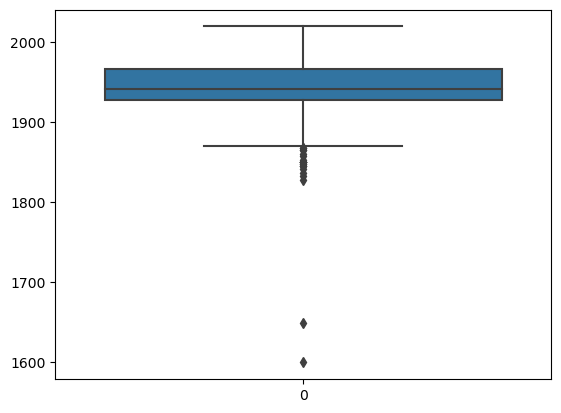

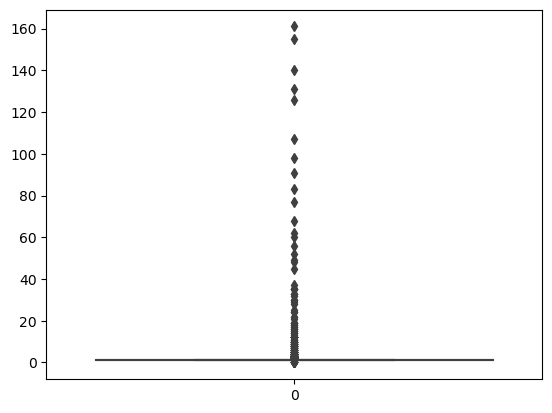

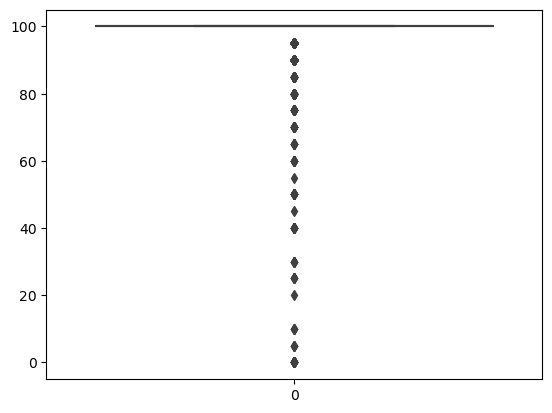

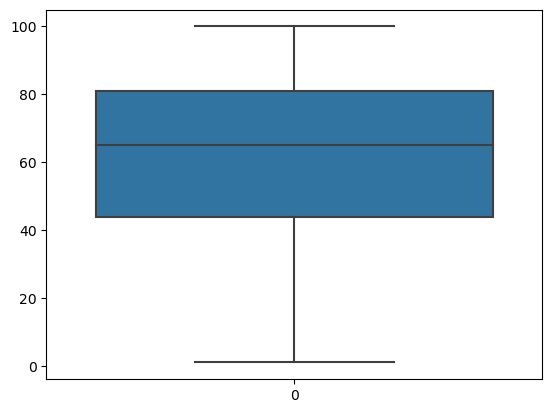

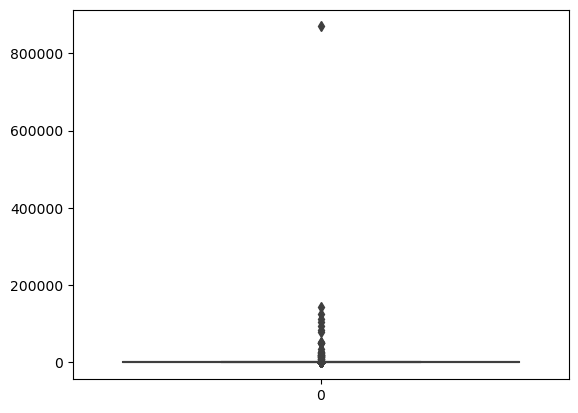

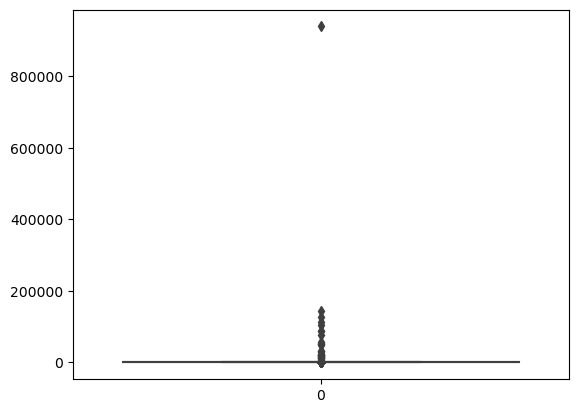

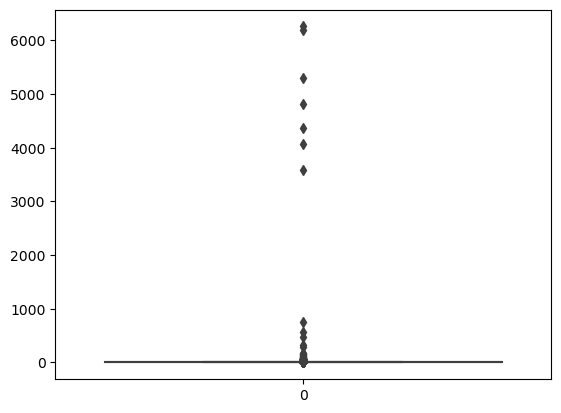

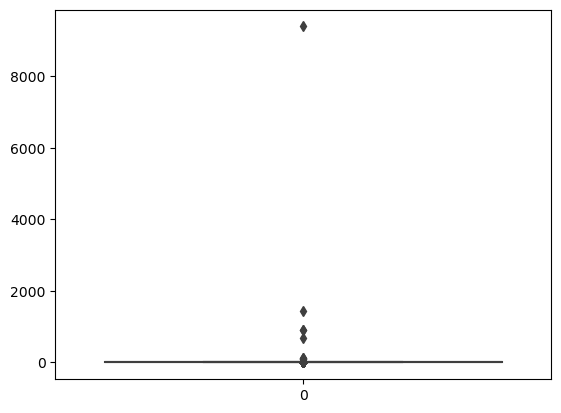

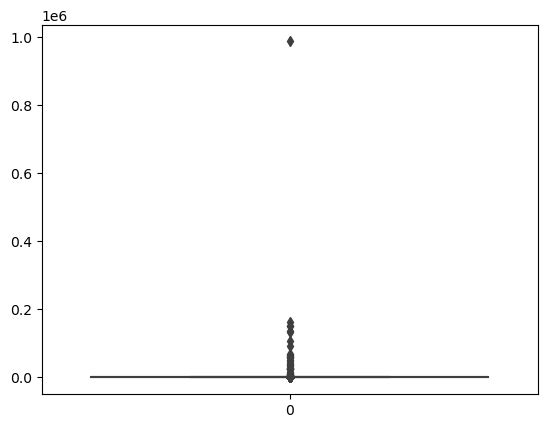

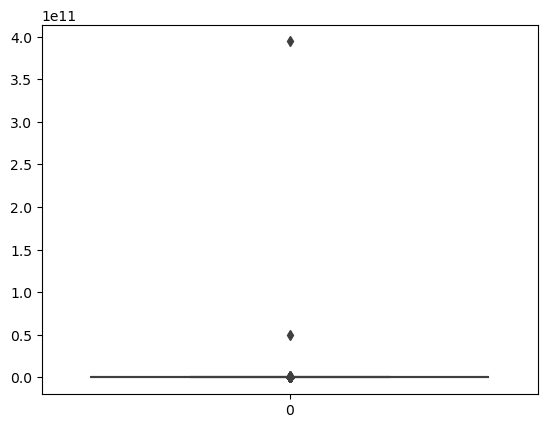

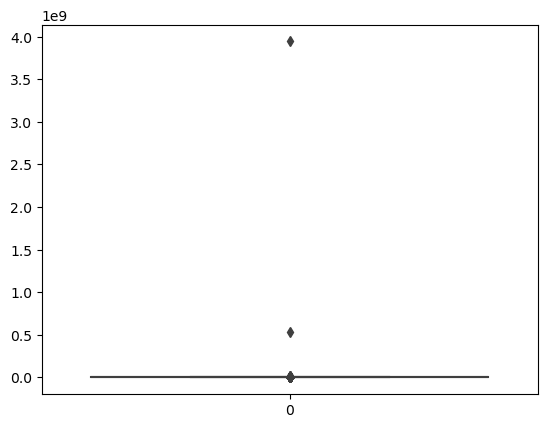

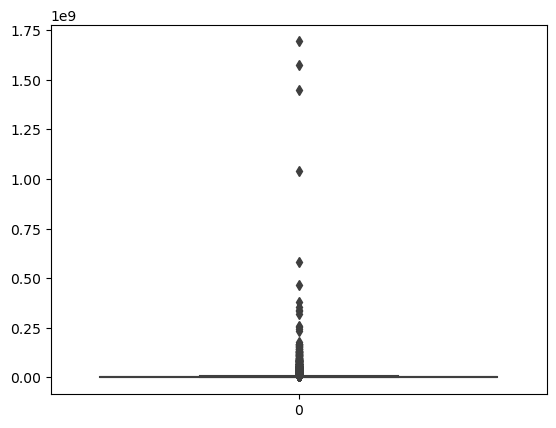

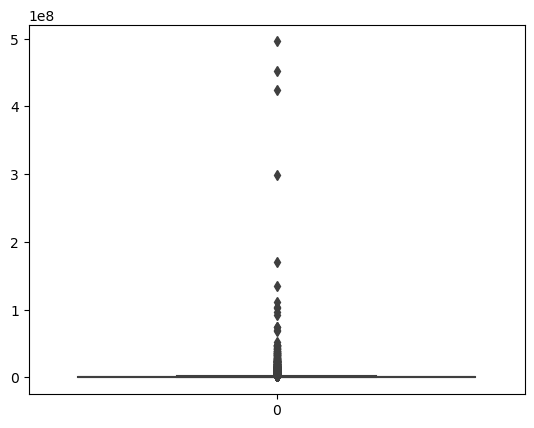

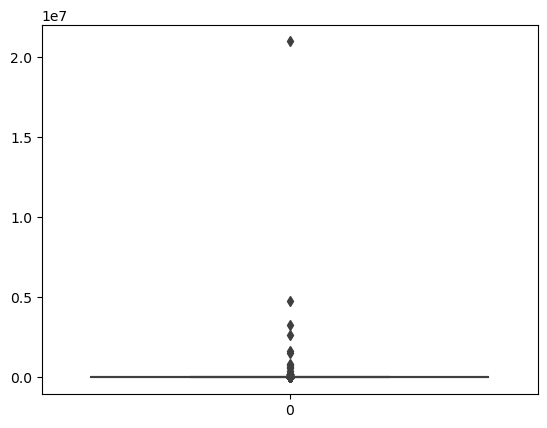

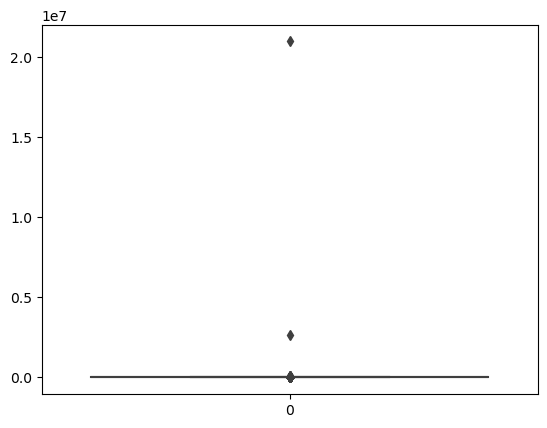

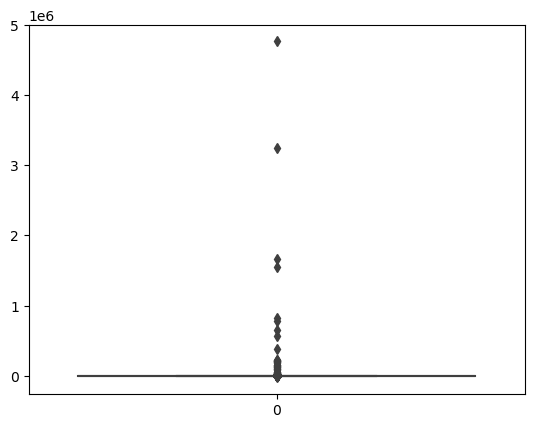

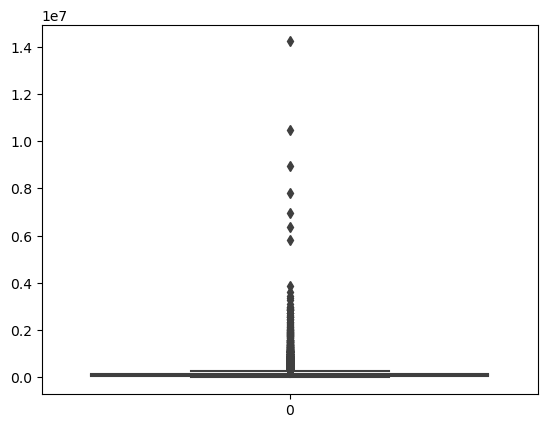

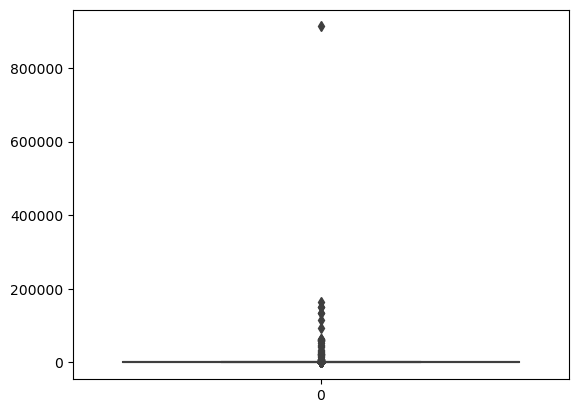

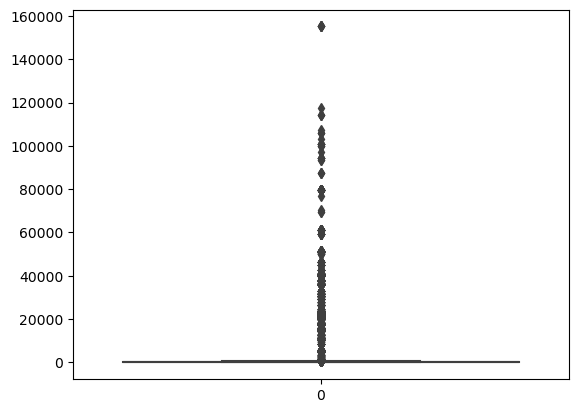

In [26]:
#this function check linearship between the target and indepedent varaibles
def box_plot(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in data.select_dtypes(exclude="object"):
    box_plot(i)

In [27]:
"""from statistics import quantiles
from scipy.stats import iqr
def handling_outliers():
    for i in data.select_dtypes(exclude="object").drop(columns=["Occupancy","Number of Buildings - Self-reported"]):
        spread=quantiles(data[i],n=4)
        IQR=iqr(data[i])
        lower=spread[0]-1.5*IQR
        upper=spread[2]+1.5*IQR
        data[i]=np.clip(data[i],lower,upper)
handling_outliers()"""
        

'from statistics import quantiles\nfrom scipy.stats import iqr\ndef handling_outliers():\n    for i in data.select_dtypes(exclude="object").drop(columns=["Occupancy","Number of Buildings - Self-reported"]):\n        spread=quantiles(data[i],n=4)\n        IQR=iqr(data[i])\n        lower=spread[0]-1.5*IQR\n        upper=spread[2]+1.5*IQR\n        data[i]=np.clip(data[i],lower,upper)\nhandling_outliers()'

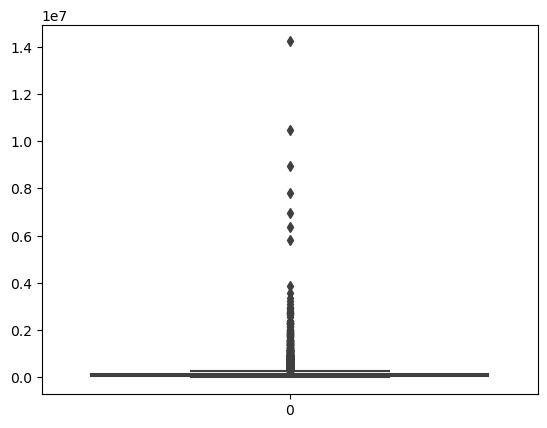

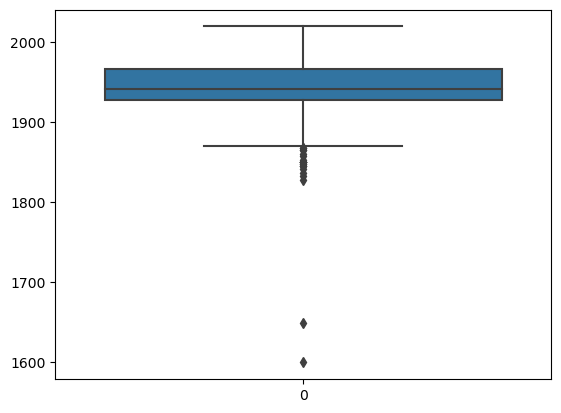

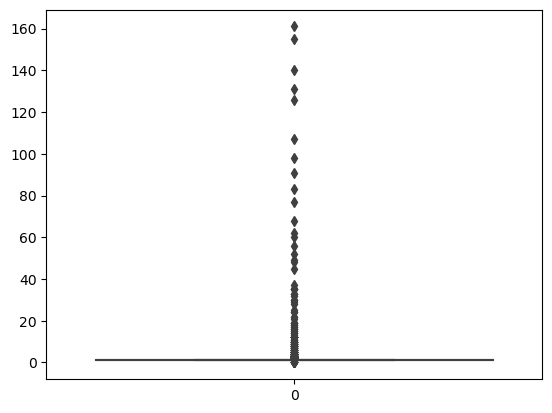

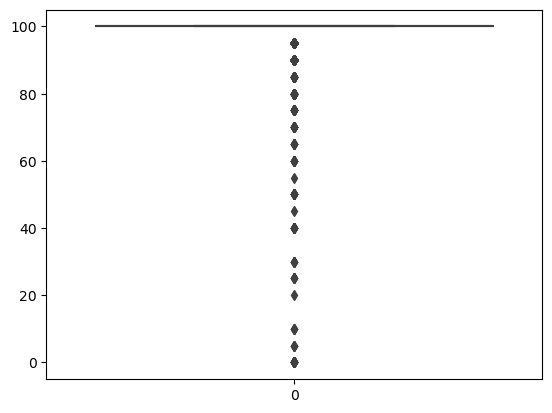

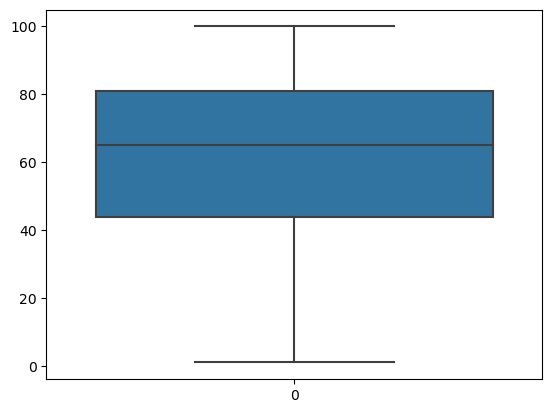

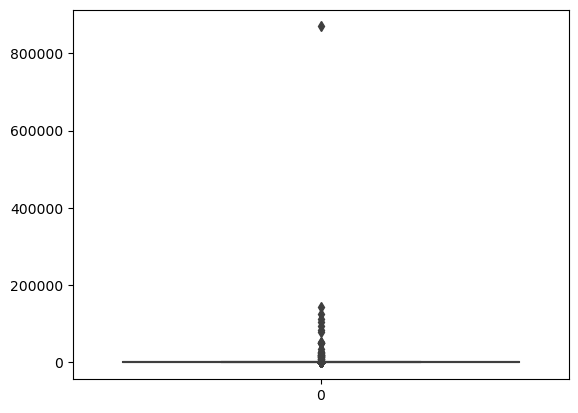

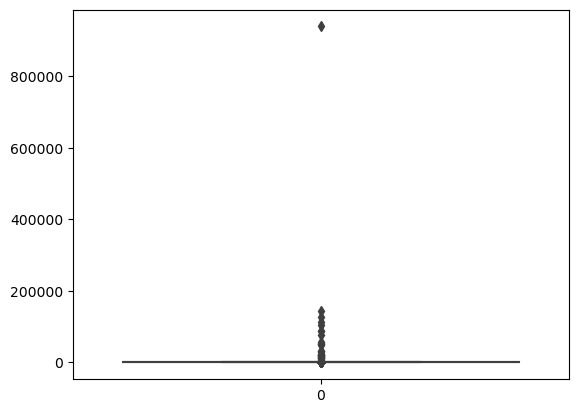

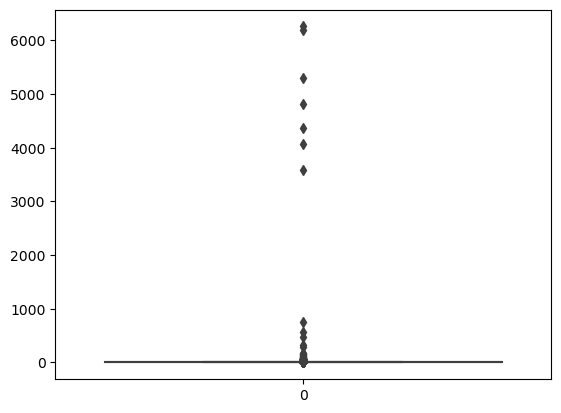

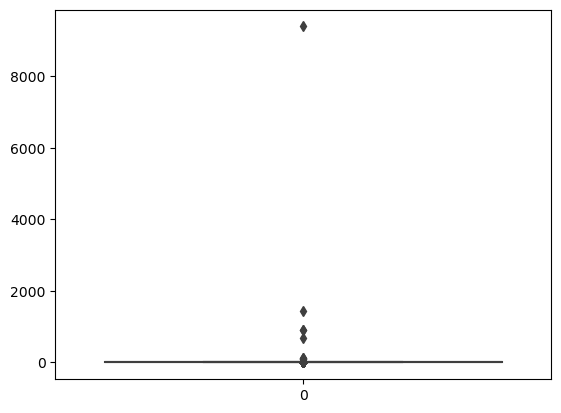

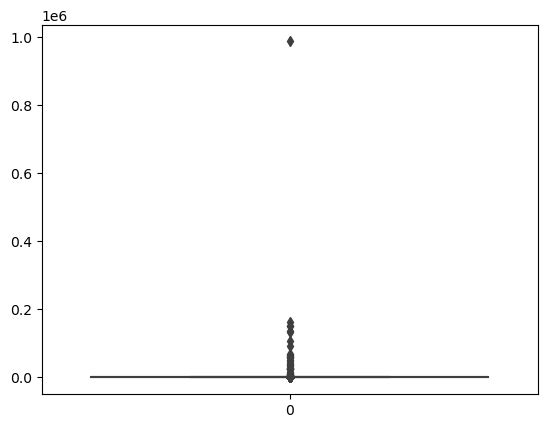

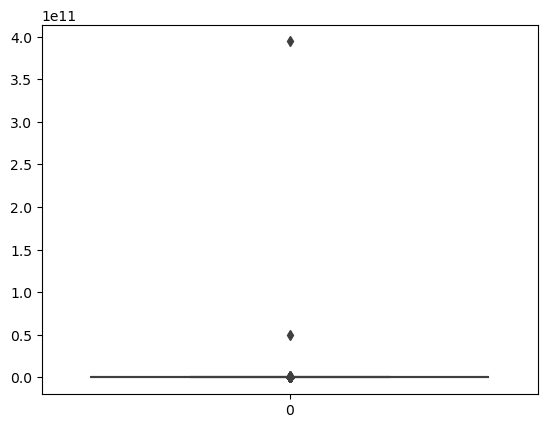

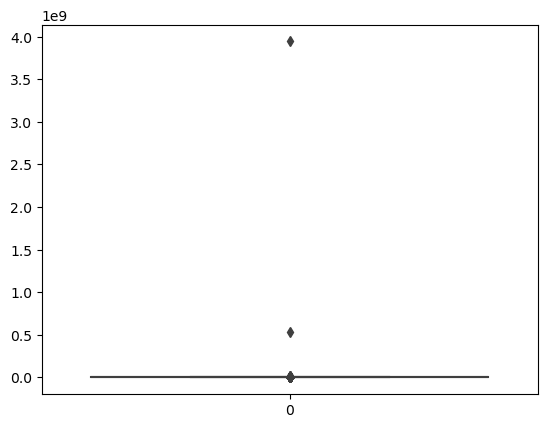

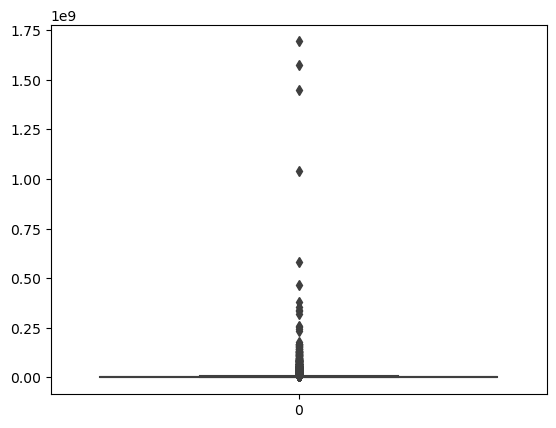

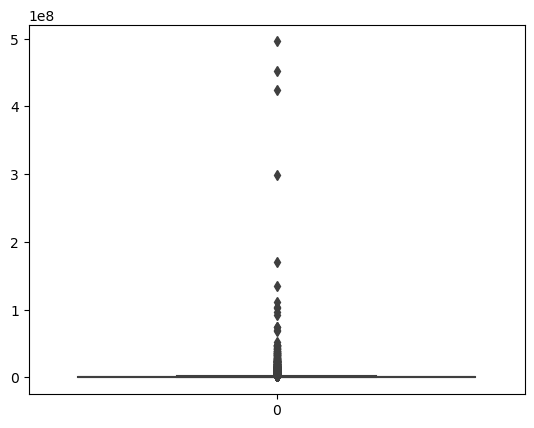

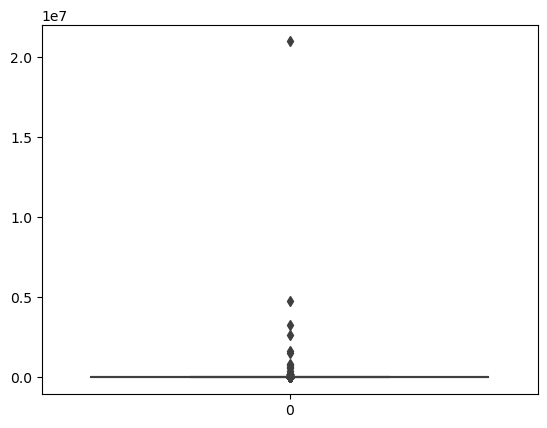

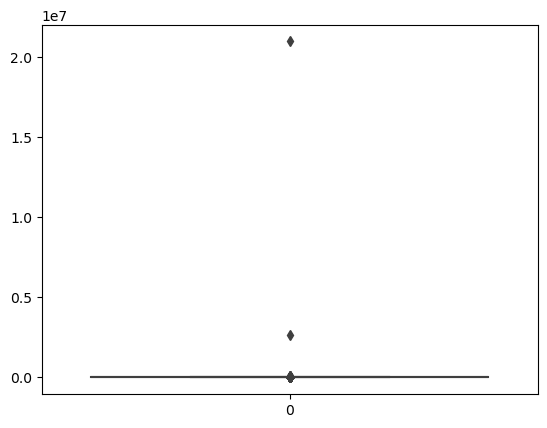

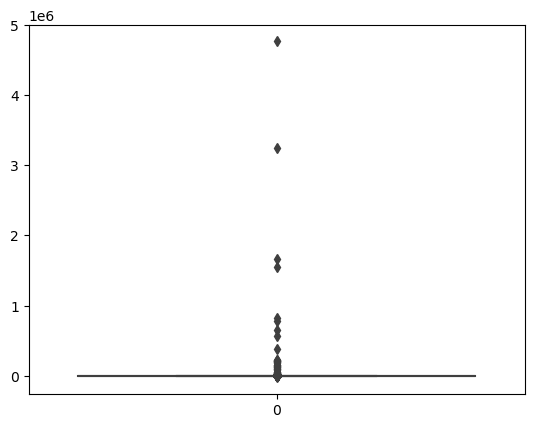

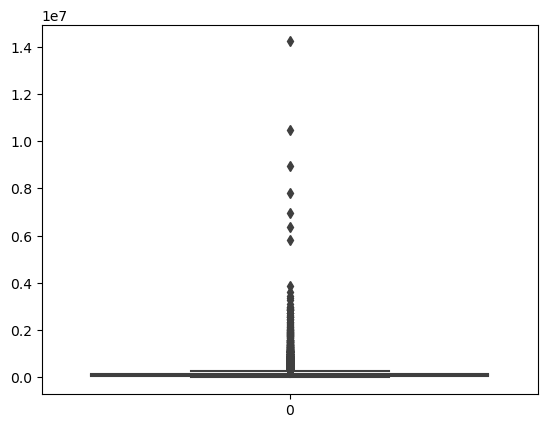

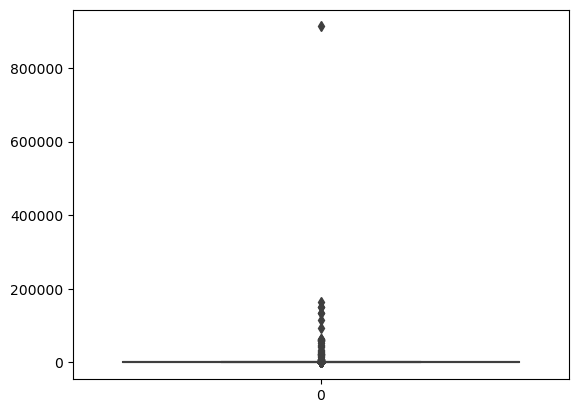

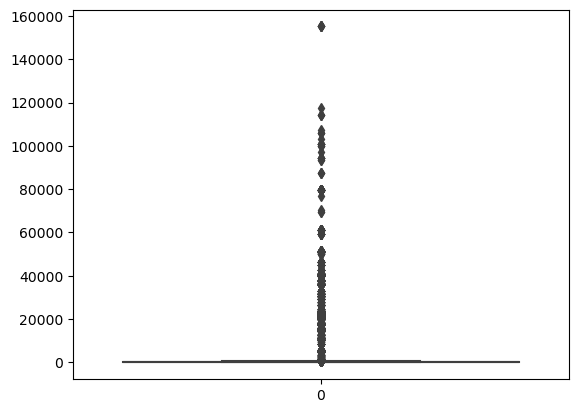

In [28]:
def box_plot(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in data.select_dtypes(exclude="object"):
    box_plot(i)

In [29]:
data=data.drop(columns=data.select_dtypes(exclude=np.number).columns[1:])

# correlation

In [30]:
s=data.select_dtypes(exclude="object").corr(method="spearman")

<Axes: >

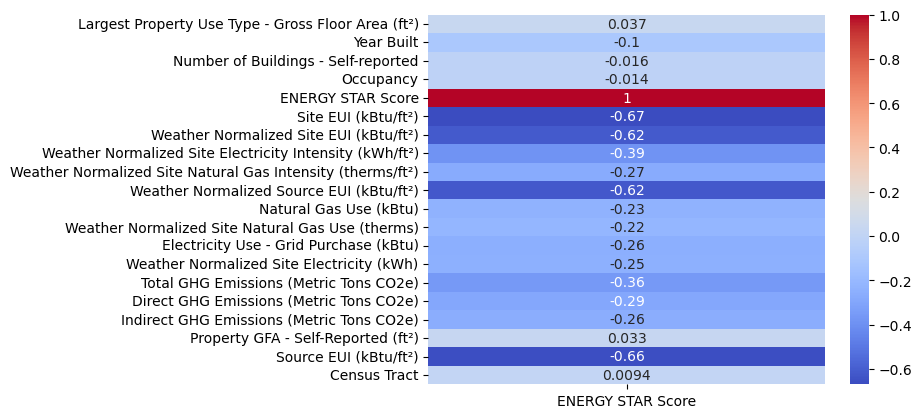

In [31]:
#visualising correaltion using heatmap
sns.heatmap(pd.DataFrame(s["ENERGY STAR Score"]),annot=True,cmap="coolwarm")

# one hot encoding

In [32]:
data=pd.get_dummies(data,columns=["Largest Property Use Type"],drop_first=True,dtype=int)


# Feature scaling

In [33]:
#spliting target and independent variable
X=data.drop(columns=["ENERGY STAR Score"])
y=data[["ENERGY STAR Score"]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for i in data:
    if i in columns:
        data[i]=scaler.fit_transform(data[[i]])        


# spliting the target and indpendent variable

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=data.drop(columns=data.select_dtypes(exclude=np.number).columns)#independent features
y=data["ENERGY STAR Score"]

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
X_train.shape

(8222, 72)

In [37]:
X_test.shape

(3524, 72)

In [38]:
y_train.shape,y_test.shape

((8222,), (3524,))

In [39]:
dm=DecisionTreeRegressor()
dm.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
y_pred=dm.predict(X_test)

In [41]:
y_pred[:5]#comparing first 5 preds with y_test

array([25., 55., 65., 79., 58.])

In [42]:
y_test[:5]

11470    25
8742     55
1277     65
9112     79
10162    58
Name: ENERGY STAR Score, dtype: int32

In [43]:
from sklearn import metrics
test_r2score=metrics.r2_score(y_test,y_pred)


In [44]:
test_mse=metrics.mean_squared_error(y_test,y_pred)

In [45]:
train_preds=dm.predict(X_train)

In [46]:
train_r2score=metrics.r2_score(y_train,train_preds)

In [47]:
train_r2score,test_r2score # comaparing score for seen and unseen data

(1.0, 1.0)

In [48]:
train_mse=metrics.mean_squared_error(y_train,train_preds)

In [49]:
train_mse,test_mse# comapring erros for seen and unseen data

(0.0, 0.0)